In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Used to create training and testing data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [ ]:
# For testing
# "Words" contains the subset of words we make predictions for. 
words =  np.array(['hvad', 'ja', 'soed'])
label_map = {label:num for num, label in enumerate(words)}

# Base path leading to directory containing folders with videos for all signs defined in "words" array
base_path = "../tegn_subset"

# Path for saving processed Data Arrays
proc_data_path = "../export_data/"

# Importing Data

In [63]:
X = np.load('../export_data/X_data.npy')
y = np.load('../export_data/y_data.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=18, stratify=y)

In [64]:
X_train.shape

(45, 151, 258)

# PCA (if needed) 

/var/folders/pk/3hclhkhs72s9x6mcm23k7cv40000gn/T/ipykernel_2848/1726224056.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(features[:, 0], features[:, 1], c = y, cmap = cmap_bold)


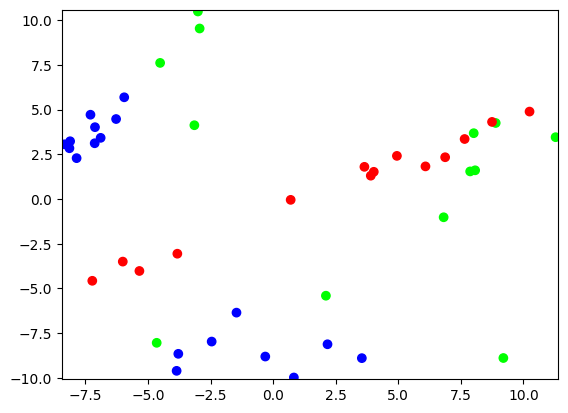

(45, 15)
(18, 15)
(45, 38958)


In [90]:
X_train2D = np.array([features_2d.flatten() for features_2d in X_train])
X_test2D = np.array([features_2d.flatten() for features_2d in X_test])

pca = PCA(n_components=15, svd_solver='full')
test = pca.fit(X_train2D)
pca_train = pca.transform(X_train2D)
pca_test = pca.transform(X_test2D)




def __visualizeLabels(features, referenceLabels):
    plt.figure()
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    y = referenceLabels

    plt.scatter(features[:, 0], features[:, 1], c = y, cmap = cmap_bold)
    plt.xlim(features[:, 0].min() - 0.1, features[:, 0].max() + 0.1)
    plt.ylim(features[:, 1].min() - 0.1, features[:, 1].max() + 0.1)
    plt.show()
  
    t = 0
    
__visualizeLabels(pca_train, y_train)

print(pca_train.shape)
print(pca_test.shape)

print(X_train2D.shape)

# kNN Algorithm

In [66]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train2D, y_train)
y_pred = knn.predict(X_test2D)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8888888888888888


In [89]:
k_values = [i for i in range (1,15)]
scores = []

for k in k_values:
    knn_amount_test = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_amount_test, X_train2D, y_train, cv=5)
    scores.append(np.mean(score))

scores

[0.8222222222222222,
 0.6,
 0.8222222222222223,
 0.711111111111111,
 0.711111111111111,
 0.6222222222222221,
 0.711111111111111,
 0.6444444444444444,
 0.6888888888888889,
 0.5555555555555556,
 0.6,
 0.4444444444444445,
 0.5111111111111111,
 0.3777777777777777]

/var/folders/pk/3hclhkhs72s9x6mcm23k7cv40000gn/T/ipykernel_2848/3749285811.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(features[:, 0], features[:, 1], c = y, cmap = cmap_bold)


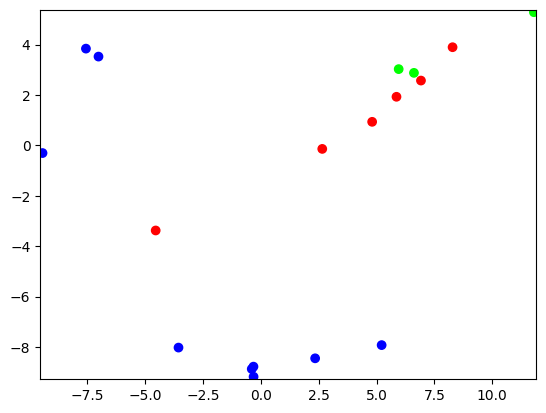

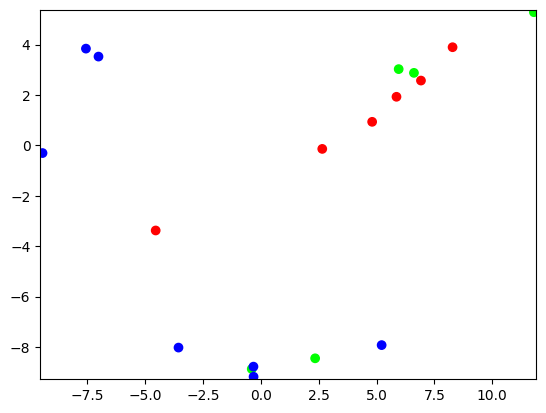

In [83]:
__visualizeLabels(pca_test, y_pred)
__visualizeLabels(pca_test, y_test)


# Random Forest

In [80]:
rForest = RandomForestClassifier(n_estimators=100)
rForest.fit(X_train2D, y_train)

RFy_pred = rForest.predict(X_test2D)
accuracy = accuracy_score(y_test, RFy_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7222222222222222
